<a href="https://colab.research.google.com/github/kislay960/Data-Science-Practice/blob/main/RNN_using_Keras_for_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
print(len(XT))
print(len(Xt))

25000
25000


In [3]:
print(XT[0])
print(len(XT[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [4]:
word_idx = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [5]:
# Create a 2D Tensor to be processed by the embedding layer
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

In [6]:
from keras.layers import Embedding,SimpleRNN,Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                3104      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
157/157 [==============================] - 26s 168ms/step - loss: 0.5924 - accuracy: 0.6746 - val_loss: 0.4367 - val_accuracy: 0.8274
Epoch 2/10
157/157 [==============================] - 26s 164ms/step - loss: 0.4424 - accuracy: 0.8110 - val_loss: 0.4464 - val_accuracy: 0.7970
Epoch 3/10
157/157 [==============================] - 26s 166ms/step - loss: 0.2742 - accuracy: 0.8943 - val_loss: 0.4049 - val_accuracy: 0.8410
Epoch 4/10
157/157 [==============================] - 26s 164ms/step - loss: 0.1820 - accuracy: 0.9336 - val_loss: 0.4604 - val_accuracy: 0.7972
Epoch 5/10
157/157 [==============================] - 26s 164ms/step - loss: 0.1063 - accuracy: 0.9647 - val_loss: 0.5093 - val_accuracy: 0.8306
Epoch 6/10
157/157 [==============================] - 26s 163ms/step - loss: 0.0667 - accuracy: 0.9787 - val_loss: 0.5404 - val_accuracy: 0.7984
Epoch 7/10
157/157 [==============================] - 26s 164ms/step - loss: 0.0390 - accuracy: 0.9888 - val_loss: 0.4796 - val_ac

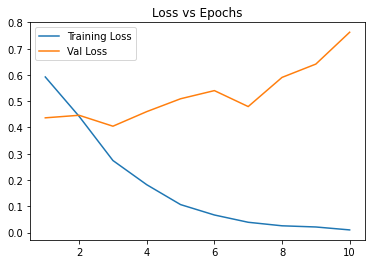

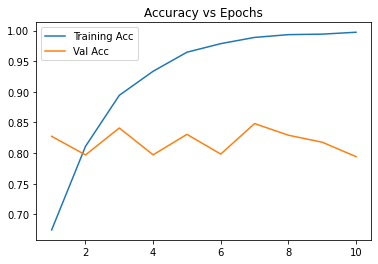

In [10]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()

plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

In [14]:
model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint # save the best model, fight overfiitting
from keras.callbacks import EarlyStopping #save time

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
earlystop = EarlyStopping(monitor='val_accuracy',patience=1)

hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Epoch 1/10
157/157 [==============================] - 26s 168ms/step - loss: 0.6389 - accuracy: 0.6159 - val_loss: 0.5051 - val_accuracy: 0.7596
Epoch 2/10
157/157 [==============================] - 26s 166ms/step - loss: 0.3882 - accuracy: 0.8306 - val_loss: 0.3563 - val_accuracy: 0.8568
Epoch 3/10
157/157 [==============================] - 26s 166ms/step - loss: 0.2673 - accuracy: 0.8951 - val_loss: 0.4064 - val_accuracy: 0.8212


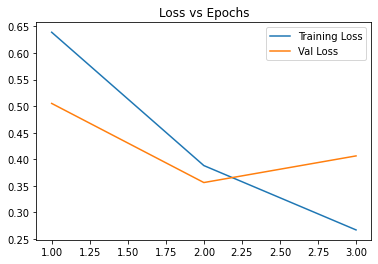

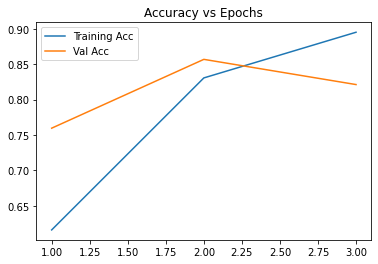

In [17]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()

plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

In [18]:
!ls

best_model.h5  sample_data


In [19]:
model.load_weights("best_model.h5")

In [20]:
model.evaluate(X_test,Yt)

782/782 [==============================] - 18s 23ms/step - loss: 0.3665 - accuracy: 0.8508


[0.3664763271808624, 0.8508399724960327]

In [21]:
model.evaluate(X_train,YT)

782/782 [==============================] - 18s 23ms/step - loss: 0.2690 - accuracy: 0.8950


[0.26899075508117676, 0.8949599862098694]